Nodes: 129,375  Edges: 4,049,642
Example node attrs: ('0', {'node_id': '9796', 'node_type': 'gene/protein', 'node_name': 'PHYHIP', 'node_source': 'NCBI'})
Example edge attrs: ('0', '8889', {'relation': 'protein_protein', 'display_relation': 'ppi'})


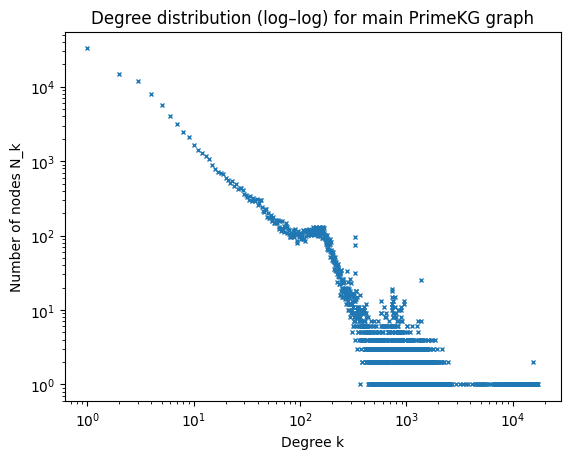

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Adjust filenames as needed
nodes = pd.read_csv("../data/primekg_full/node.csv", sep="\t", dtype=str)      # node_index  node_id  node_type  node_name  node_source
edges = pd.read_csv("../data/primekg_full/edges.csv", dtype=str)               # relation, display_relation, x_index, y_index

# Basic sanity checks (optional)
required_node_cols = {"node_index","node_id","node_type","node_name","node_source"}
required_edge_cols = {"relation","display_relation","x_index","y_index"}
assert required_node_cols.issubset(nodes.columns), f"Missing node cols: {required_node_cols - set(nodes.columns)}"
assert required_edge_cols.issubset(edges.columns), f"Missing edge cols: {required_edge_cols - set(edges.columns)}"

# Build graph (undirected; switch to nx.DiGraph() if you need direction)
G = nx.Graph()

# Add nodes with attributes
for row in nodes.itertuples(index=False):
    G.add_node(
        row.node_index,                   # use node_index as the Graph node ID
        node_id=row.node_id,
        node_type=row.node_type,
        node_name=row.node_name,
        node_source=row.node_source,
    )

# Add edges with attributes
for row in edges.itertuples(index=False):
    G.add_edge(
        row.x_index, row.y_index,
        relation=row.relation,
        display_relation=row.display_relation
    )

# Quick checks
print(f"Nodes: {G.number_of_nodes():,}  Edges: {G.number_of_edges():,}")
print("Example node attrs:", next(iter(G.nodes(data=True))))
print("Example edge attrs:", next(iter(G.edges(data=True))))


# degrees (unweighted)
degrees = np.fromiter((d for _, d in G.degree()), dtype=int)

# unique degree values k and their counts N_k
k, counts = np.unique(degrees, return_counts=True)

plt.figure()
plt.loglog(k, counts, marker="x", linestyle="none", markersize=3)
plt.xlabel("Degree k")
plt.ylabel("Number of nodes N_k")
plt.title("Degree distribution (log–log) for main PrimeKG graph")
plt.show()

In [21]:
t = nx.transitivity(G)             # global clustering coefficient
a = nx.average_clustering(G)       # mean of local clustering
print(t, a)

KeyboardInterrupt: 